In [270]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def extract_features(data):   
    X = data[['Name','Pclass','Age','Sex','Fare','Ticket','Embarked','SibSp','Parch']].copy()
    X['Family'] = X['SibSp'] + X['Parch']
    X['Female'] = (X['Sex'] == 'female').astype(int)
    X['Fare'] = X['Fare'].fillna(X['Fare'].median())
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
    X['Title'] = X['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
    X['Title'] = X['Title'].replace(['Major','Col','Sir','Don','Jonkheer','Capt','Rev','Dr'], 'Mr')
    X['Title'] = X['Title'].replace(['Lady','Countess','Dona'], 'Mrs')
    X['Title'] = X['Title'].replace(['Mlle','Mme','Ms'], 'Miss')
    X['Age'] = X.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
    X['Fare'] = X.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
    X['Boy'] = ((X['Age'] < 16) & (X['Sex'] == 'male') & (X['Family'] > 0)).astype(int)
    X['Group'] = X['Pclass'].astype(str) + X['Ticket'].str[:-1] + X['Embarked'] + X['Fare'].astype(str)
    X['Group'] = X.groupby('Group')['Group'].transform(lambda x: '-' if len(x) < 2 else x)
    X['Age'] = pd.cut(X['Age'], bins=[0,9,16,30,100])
    X['Family'] = pd.cut(X['Family'], bins=[0,1,6,20])
    X['Fare'] = pd.cut(X['Fare'], bins=[0,10,20,30,100])
    X = pd.get_dummies(X, columns=['Pclass','Embarked','Age','Fare','Family','Group'])
    return X.drop(['Name','Ticket','Sex','SibSp','Title','Parch'], axis=1)

def align_features(X_train, X_test):
    return X_train.align(X_test, join='outer', axis=1, fill_value=0)

def extract_target(data):
    return data['Survived'].copy()

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('my_test.csv') #@!

y_train = extract_target(train_data)
y_test = extract_target(test_data) #@!
X_train = extract_features(train_data)
X_test = extract_features(test_data)
X_train, X_test = align_features(X_train, X_test)

m = LogisticRegression()
# m = KNeighborsClassifier(n_neighbors=8)
# m = RandomForestClassifier(n_estimators=100)
m.fit(X_train, y_train)

# out = pd.DataFrame()
# out['PassengerId'] = test_data.PassengerId
# out['Survived'] = m.predict(X_test)
# out.to_csv('my_submission.csv', index=False)

# cross_val_score(m, X_train, y_train, scoring='accuracy', cv=3).mean()
accuracy_score(y_test, m.predict(X_test)) #@!

0.8040201005025126

In [254]:
import numpy as np
import pandas as pd

X = pd.read_csv('train.csv')
X['Family'] = X['SibSp'] + X['Parch']
X['Female'] = X['Sex'].map({'male':0,'female':1})
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])
X['Title'] = X['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
X['Title'] = X['Title'].replace(['Major','Col','Sir','Don','Jonkheer','Capt','Rev','Dr'], 'Mr')
X['Title'] = X['Title'].replace(['Lady','Countess','Dona'], 'Mrs')
X['Title'] = X['Title'].replace(['Mlle','Mme','Ms'], 'Miss')
X['Age'] = X.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
X['Fare'] = X.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
X['Boy'] = ((X['Age'] < 16) & (X['Sex'] == 'male') & (X['Family'] > 0)).astype(int)
X['Group'] = X['Pclass'].astype(str) + X['Ticket'].str[:-1] + X['Embarked'] + X['Fare'].astype(str)
X['Group'] = X.groupby('Group')['Group'].transform(lambda x: '-' if len(x) < 2 else x)
# if 'Survived' not in X: X['Survived'] = 0
X['Rate'] = X.groupby('Group')['Survived'].transform(lambda g: g.mean())
X.sort_values(by='Group').drop(['PassengerId','Title','Cabin','Ticket'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Female,Boy,Group,Rate
445,1,1,"Dodge, Master. Washington",male,4.0,0,2,81.85830,S,2,0,1,-,0.334375
315,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,7.85420,S,0,1,0,-,0.334375
814,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,8.05000,S,0,0,0,-,0.334375
312,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,26.00000,S,2,1,0,-,0.334375
304,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,30.0,0,0,8.05000,S,0,0,0,-,0.334375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,11.72500,S,3,1,0,3W./C. 660S11.725,0.000000
147,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,8.59375,S,4,1,0,3W./C. 660S8.59375,0.000000
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,8.59375,S,4,0,0,3W./C. 660S8.59375,0.000000
736,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,8.59375,S,4,1,0,3W./C. 660S8.59375,0.000000


In [208]:
# pd.set_option('display.max_rows', 500)
test_data[y_test != m.predict(X_test)].sort_values(by='Survived')

,Pclass,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
172,2,0.0,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S,NaN
305,3,0.0,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S,NaN
183,3,0.0,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S,NaN
302,3,0.0,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S,NaN
301,3,0.0,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q,NaN
194,2,0.0,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,F.C.C. 13534,21.0000,NaN,S,NaN
298,3,0.0,"Rasmussen, Mrs. (Lena Jacobsen Solvang)",female,NaN,0,0,65305,8.1125,NaN,S,NaN
205,3,0.0,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S,NaN
284,3,0.0,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN
208,3,0.0,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S,NaN


In [209]:
from sklearn.model_selection import GridSearchCV
m = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2'],'solver': ['liblinear']}
cv = GridSearchCV(m, grid, scoring='accuracy', cv=3)
cv.fit(X_train, y_train)
cv.best_estimator_, cv.best_score_

(LogisticRegression(C=100, solver='liblinear'), 0.8417508417508417)

In [215]:
# X_train.columns.values[np.argsort(np.abs(m.coef_[0]))].tolist()
sorted(zip(X_train.columns.values, np.abs(m.coef_[0])), key=lambda x: x[1], reverse=True)

[('Female', 2.9724625735851826),
 ('Group_3160S8.070828571428573', 2.2194833354281114),
 ('Group_3STON/O 2. 310128S7.925', 2.1406673187298093),
 ('Boys', 2.1116669194701316),
 ('Group_334708S4.4678571428571425', 1.4999007705597645),
 ('Family_(6, 20]', 1.3676522528156307),
 ('Group_338265Q5.825', 1.3152021139407377),
 ('Group_334708S4.6499999999999995', 1.2737556307389066),
 ('Group_334990S5.26875', 1.2014410467679866),
 ('Group_336484Q7.75', 1.10819850199109),
 ('Group_3310129S6.614583333333333', 1.0893427378787046),
 ('Group_334577S9.5', 1.0891830136697722),
 ('Group_3413S6.366675', 1.03949371356269),
 ('Group_1PC 1747S26.2875', 1.026882884370968),
 ('Group_111378S37.8875', 1.0044841631542225),
 ('Group_3W./C. 660S8.59375', 0.9957471394497927),
 ('Group_336722Q11.625', 0.9916580335625007),
 ('Group_3266C7.2271', 0.9742317060882055),
 ('Group_3267C7.6229', 0.9685760700172625),
 ('Group_3269C7.2271', 0.9402492674473472),
 ('Group_3265C7.87085', 0.9139762169260137),
 ('Pclass_3', 0.8932

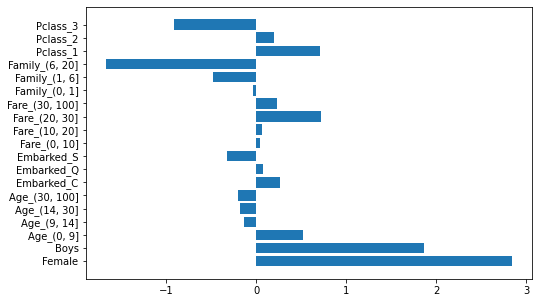

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(X_train.columns.values, m.coef_[0]);

In [818]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('my_test.csv') #@!
train_len = len(train_data)

df = pd.concat([train_data, test_data])
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
df['Last_Name'] = df['Name'].str.split(",").str.get(0)
df['Age'] = df.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = df.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: '< 3' if len(x) < 3 else x)
df = df.drop(['PassengerId','Name','Title','Last_Name','Cabin','SibSp','Parch'], axis=1)

df['Fare'] = pd.cut(df['Fare'], bins=[0,10,20,30,100])
df['Age'] = pd.cut(df['Age'], bins=[0,8,14,31,100])
df = pd.get_dummies(df, columns=['Pclass','Sex','Age','Embarked','Fare','Ticket'])

y_train = df[:train_len]['Survived']
y_test = df[train_len:]['Survived'] #@!
X_train = df[:train_len].drop(['Survived'], axis=1)
X_test = df[train_len:].drop(['Survived'], axis=1)

m = LogisticRegression()
# m = KNeighborsClassifier(n_neighbors=3, weights='distance')
# m = RandomForestClassifier()
m.fit(X_train, y_train)

out = pd.DataFrame()
out['PassengerId'] = test_data.PassengerId
out['Survived'] = m.predict(X_test)
out.to_csv('my_submission.csv', index=False)

# cross_val_score(m, X_train, y_train, scoring='accuracy', cv=3).mean()
accuracy_score(y_test, m.predict(X_test)) #@!

0.7989949748743719

In [826]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('my_test.csv') #@!
train_len = len(train_data)

df = pd.concat([train_data, test_data])
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.').fillna('NA')
df['Last_Name'] = df['Name'].str.split(",").str.get(0)
df['Age'] = df.groupby(['Title'])['Age'].transform(lambda g: g.fillna(g.median()))
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Fare'] = df.groupby('Ticket')['Fare'].transform(lambda x: x / len(x))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Ticket'] = df.groupby('Ticket')['Ticket'].transform(lambda x: '< 3' if len(x) < 3 else x)
df = df.drop(['PassengerId','Name','Title','Last_Name','Cabin','SibSp','Parch'], axis=1)

df['Fare'] = pd.cut(df['Fare'], bins=[0,10,20,30,100])
df['Age'] = pd.cut(df['Age'], bins=[0,8,15,30,100]) #[0,7.90,14.45,31.28,120]
# df = pd.get_dummies(df, columns=['Pclass','Sex','Age','Embarked','Fare','Ticket'])
# df['Ticket'].unique()